In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [41]:
df=pd.read_csv('train.csv')
df['date']=pd.to_datetime(dict(year=df.year,month=df.month,day=df.day))
date=df.pop('date')
df.insert(0,'date',date)
df.head()

,date,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,1992-12-13,1992,12,13,-4.99,156.0,4.8,-2.8,78.5,28.98,30.06
1,1989-05-14,1989,5,14,0.00,-110.1,-2.5,2.4,NaN,24.95,25.23
2,1993-06-28,1993,6,28,2.04,-110.2,-4.5,5.9,NaN,25.78,27.84
3,1995-01-08,1995,1,8,1.98,-140.0,-7.7,1.2,82.6,26.47,26.86
4,1995-02-21,1995,2,21,5.01,-170.0,-5.4,-6.6,75.2,28.83,28.90


In [65]:
df.sort_values(['date'],inplace=True)
df.reset_index(inplace=True,drop=True)
#df.set_index('date',inplace=T)
df.dropna(subset=['air temp.'],inplace=True)
df['zon.winds'].fillna(np.random.normal(-3.505847,3.222261),inplace=True)
df['mer.winds'].fillna(np.random.normal(0.451069,2.927329),inplace=True)
df['humidity'].fillna(np.random.normal(81.267260,5.363381),inplace=True)

x=df.iloc[:,1:-1]
y=df.iloc[:,-1]
x.head()

,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.
0,1980,3,8,-0.02,-109.44,-4.9,1.1,86.568814,25.66
1,1980,3,9,-0.02,-109.44,-4.5,2.2,86.568814,25.69
2,1980,3,10,-0.02,-109.44,-3.8,1.9,86.568814,25.56
3,1980,3,12,-0.02,-109.44,-4.4,0.3,86.568814,24.72
4,1980,3,13,-0.02,-109.44,-3.2,0.1,86.568814,24.66


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, KBinsDiscretizer, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor

tss=TimeSeriesSplit(n_splits=3)
for train,test in tss.split(x):
    x_train,x_test=x.iloc[train,:],x.iloc[test,:]
    y_train,y_test=y.iloc[train],y.iloc[test]

#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
x_train.describe()

,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.
count,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000,72429.000000
mean,1991.757777,6.499607,15.717420,0.496709,-52.709306,-3.731852,0.544082,83.641294,26.742221
std,2.767660,3.465327,8.795031,4.457818,133.695223,3.293105,2.813189,4.553125,1.843928
min,1980.000000,1.000000,1.000000,-8.330000,-180.000000,-12.200000,-10.800000,54.000000,17.050000
25%,1990.000000,4.000000,8.000000,-2.020000,-140.100000,-6.500000,-1.200000,80.700000,25.840000
50%,1993.000000,6.000000,16.000000,0.010000,-110.100000,-4.500000,0.900156,86.568814,27.190000
75%,1994.000000,10.000000,23.000000,4.990000,147.000000,-1.900000,2.200000,86.568814,28.060000
max,1995.000000,12.000000,31.000000,9.030000,170.000000,12.500000,11.000000,99.600000,31.480000


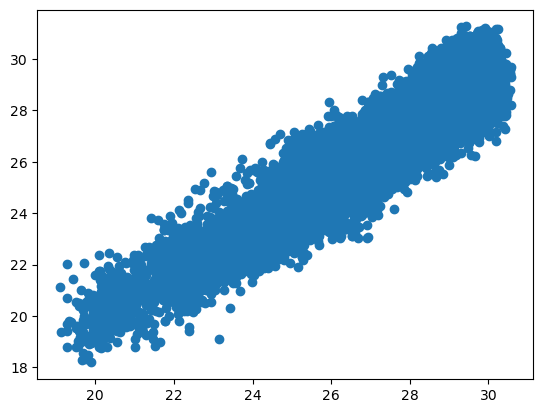

In [67]:
mod=KNeighborsRegressor()
mod.fit(X=x_train,y=y_train)
pred=mod.predict(x_test)
plt.scatter(pred,y_test)

In [68]:
mean_absolute_error(y_test,pred)

0.7238845994532349

In [69]:
root_mean_squared_error(y_test,pred)

0.9107985861965744

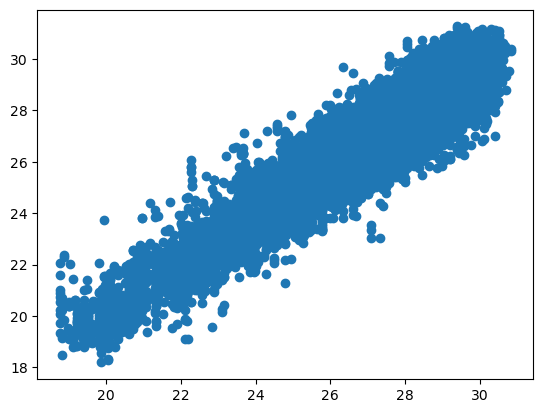

In [70]:
mod=Pipeline([('scale',StandardScaler()),
              ('model',KNeighborsRegressor(n_neighbors=1))])
#mod.get_params
mod.fit(X=x_train,y=y_train)
pred=mod.predict(x_test)
plt.scatter(pred,y_test)

In [71]:
mean_absolute_error(y_test,pred)

0.5798819484715433

In [72]:
root_mean_squared_error(y_test,pred)

0.7490690850932236

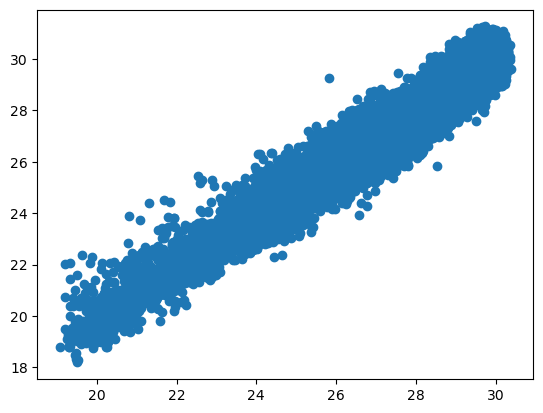

In [62]:
mod=GridSearchCV(estimator=mod,
                 param_grid={'model__n_neighbors': range(1,11)},
                 cv=3)
mod.fit(X=x_train,y=y_train)
pred=mod.predict(x_test)
plt.scatter(pred,y_test)

In [63]:
mean_absolute_error(y_test,pred)

0.41733286388865876

In [64]:
root_mean_squared_error(y_test,pred)

0.5353154300437696